In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yfin

yfin.pdr_override()

In [2]:
def Covariance(x_array, y_array, mux = None, muy = None):
    """Calculates the sample covariance between two random variables.

    Args:
        x_array (ndarray of floats): 1d array of floats
        y_array (ndarray of floats): 1d array of floats
        mux (float, optional): True mean value of X. Defaults to None.
        muy (_type_, optional): True mean value of Y. Defaults to None.
    
    Returns:
        cov (float): sample covariance between the two random variables.
    """
    assert len(x_array) == len(y_array), "Arrays must be of the same legth."
    
    n = len(x_array)
    
    if mux == None:
        mux = x_array.mean()
    if muy == None:
        muy = y_array.mean()
        
    dx = x_array - mux
    dy = y_array - muy
    
    cov = (1/n) * np.dot(dx, dy)
    
    return cov

Sample covariance between X and Y is 0.8501683501683502


Text(0, 0.5, '$y$')

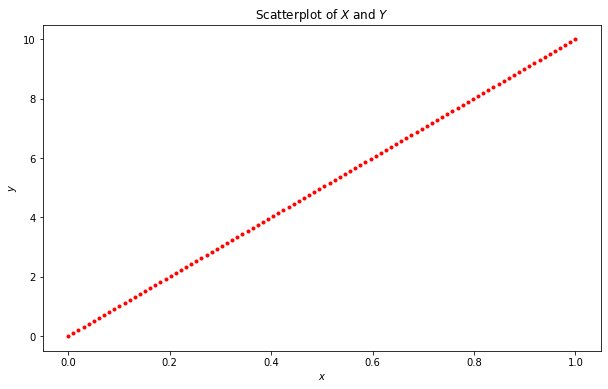

In [3]:
n = 100
x_array = np.linspace(0, 1, n)
y_array = np.linspace(0, 10, n)

covariance_xy = Covariance(x_array, y_array)
print("Sample covariance between X and Y is", covariance_xy)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_array, y_array, marker=".", c="red")
ax.set_title("Scatterplot of $X$ and $Y$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
# ax.set_aspect("equal")

In [4]:
# Compute sample standard deviations
x_stdev = x_array.std(ddof=1)
y_stdev = y_array.std(ddof=1)

# Calculate Pearson correlation coefficient
pearson_r = covariance_xy / (x_stdev * y_stdev)

print(f"X and Y has a sample Pearson correlation coefficient of {pearson_r:.2f}")

X and Y has a sample Pearson correlation coefficient of 0.99


Pearson Correlation only measures the **linear** relationship between two variables !! To look for non-linear relationships, we must look at *Spearman's Rank Correlation*

## Spearman's Rank Correlation ##

In [5]:
def PearsonCorr(x_array, y_array, mux=None, muy=None):
    """Calculates the sample correlation coefficient between two random variables.

    Args:
        x_array (ndarray of floats): 1d array of floats
        y_array (ndarray of floats): 1d array of floats
        mux (float, optional): True mean value of X. Defaults to None.
        muy (_type_, optional): True mean value of Y. Defaults to None.
    
    Returns:
        pearson_r (float): sample correlation coefficient between the two random variables.
    """
    assert len(x_array) == len(y_array), "Arrays must be of the same legth."
    
    n = len(x_array)
    
    if mux == None:
        mux = x_array.mean()
    if muy == None:
        muy = y_array.mean()
        
    x_stdev = x_array.std(ddof=1)
    y_stdev = y_array.std(ddof=1)
        
    dx = x_array - mux
    dy = y_array - muy
    
    covariance_xy = (1/n) * np.dot(dx, dy)
    
    pearson_r = covariance_xy / (x_stdev * y_stdev)
    
    return pearson_r

PearsonCorr(x_array, y_array)

0.9900000000000001

Pearson correlation coefficient = 0.907
Spearman correlation coefficient = 0.990


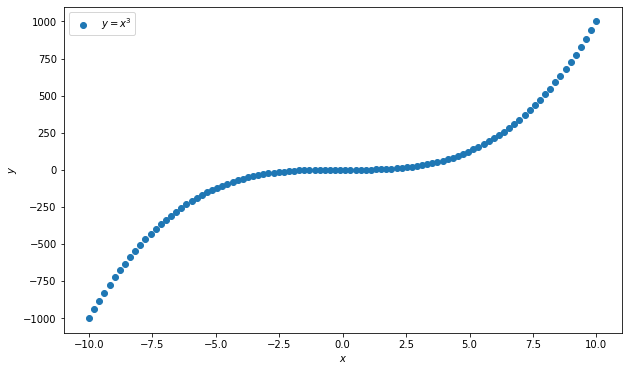

In [6]:
x_array = np.linspace(-10, 10, 100)
y_array = x_array ** 3

def SpearmanCorr(x_array, y_array):
    x_ranks = pd.Series(x_array).rank()
    y_ranks = pd.Series(y_array).rank()
    
    return PearsonCorr(x_ranks, y_ranks)

pecorr = PearsonCorr(x_array, y_array)
spcorr = SpearmanCorr(x_array, y_array)

print(f"Pearson correlation coefficient = {pecorr:.3f}")
print(f"Spearman correlation coefficient = {spcorr:.3f}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_array, y_array, label="$y = x^3$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

# Notice Spearman's correlation coefficient is more insightful in non-linear relationships.

In [7]:
# Let's construct a portfolio consisting of JPM stock and BTC cryptocurrency and look at the portfolio's performance for the last 5 years

start = datetime.date.today()-datetime.timedelta(365*5)
end = datetime.date.today()

prices = web.DataReader(["JPM", "BTC-USD"], start, end)["Adj Close"]
prices = prices.rename(columns={"BTC-USD": "BTC"})
prices = prices.dropna()

returns = prices.pct_change()
#returns = returns.dropna()

print(prices)
print(returns)

[*********************100%***********************]  2 of 2 completed
                     BTC         JPM
Date                                
2018-09-17   6281.200195   97.856461
2018-09-18   6371.299805   98.251869
2018-09-19   6398.540039  101.105736
2018-09-20   6519.669922  101.973915
2018-09-21   6734.950195  101.303452
...                  ...         ...
2023-09-11  25162.654297  144.460007
2023-09-12  25833.343750  146.339996
2023-09-13  26228.324219  146.410004
2023-09-14  26539.673828  149.250000
2023-09-15  26608.693359  148.809998

[1258 rows x 2 columns]
                 BTC       JPM
Date                          
2018-09-17       NaN       NaN
2018-09-18  0.014344  0.004041
2018-09-19  0.004275  0.029046
2018-09-20  0.018931  0.008587
2018-09-21  0.033020 -0.006575
...              ...       ...
2023-09-11 -0.028681  0.004380
2023-09-12  0.026654  0.013014
2023-09-13  0.015290  0.000478
2023-09-14  0.011871  0.019398
2023-09-15  0.002601 -0.002948

[1258 rows x 2 column

In [8]:
# Determine initial investment: We decide to buy 100 stocks of JPM and 5 Bitcoin at the beginning.
initialJPM = prices["JPM"][0] * 100
initialBTC = prices["BTC"][0] * 5
initialInvestment = initialJPM + initialBTC

# Determine weights
weightJPM = initialJPM / initialInvestment
weightBTC = initialBTC / initialInvestment
weights_array = np.array((weightJPM, weightBTC))

print(f"Initial investment in JPM: ${initialJPM}")
print(f"Initial investment in BTC: ${initialBTC}")
print(f"weights array (JPM, BTC): {weights_array}")

Initial investment in JPM: $9785.646057128906
Initial investment in BTC: $31406.0009765625
weights array (JPM, BTC): [0.23756385 0.76243615]


In [9]:
# Calculate portfolio return
returns["Portfolio"] = (weights_array[0] * returns["JPM"]) + (weights_array[1] * returns["BTC"])
returns

,BTC,JPM,Portfolio
Date,,,
2018-09-17,NaN,NaN,NaN
2018-09-18,0.014344,0.004041,0.011897
2018-09-19,0.004275,0.029046,0.010160
2018-09-20,0.018931,0.008587,0.016473
2018-09-21,0.033020,-0.006575,0.023614
...,...,...,...
2023-09-11,-0.028681,0.004380,-0.020827
2023-09-12,0.026654,0.013014,0.023414
2023-09-13,0.015290,0.000478,0.011771


In [10]:
# Let's say we want to start with an investment of $10000 and track our portfolio position's value using .cumprod()
returns_cumulative = returns.copy()
returns_cumulative += 1  # we'll use the data entries as a multiplier
returns_cumulative.iloc[0] = 10000
returns_cumulative

,BTC,JPM,Portfolio
Date,,,
2018-09-17,10000.000000,10000.000000,10000.000000
2018-09-18,1.014344,1.004041,1.011897
2018-09-19,1.004275,1.029046,1.010160
2018-09-20,1.018931,1.008587,1.016473
2018-09-21,1.033020,0.993425,1.023614
...,...,...,...
2023-09-11,0.971319,1.004380,0.979173
2023-09-12,1.026654,1.013014,1.023414
2023-09-13,1.015290,1.000478,1.011771


In [11]:
returns_cumulative = returns_cumulative.cumprod()  # data entries are now cumulative returns
returns_cumulative

,BTC,JPM,Portfolio
Date,,,
2018-09-17,10000.000000,10000.000000,10000.000000
2018-09-18,10143.443302,10040.407003,10118.965602
2018-09-19,10186.811183,10332.045037,10221.775788
2018-09-20,10379.656306,10420.764710,10390.164193
2018-09-21,10722.393788,10352.249708,10635.515293
...,...,...,...
2023-09-11,40060.264781,14762.439380,39542.119407
2023-09-12,41128.037551,14954.556448,40467.947958
2023-09-13,41756.867164,14961.710531,40944.294610


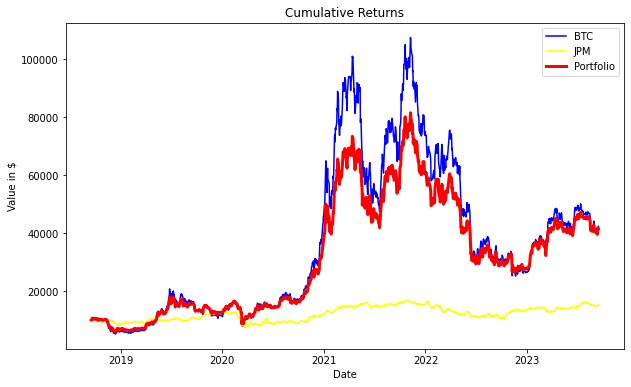

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(returns_cumulative["BTC"], c = "blue", label="BTC")
ax.plot(returns_cumulative["JPM"], c = "yellow", label="JPM")
ax.plot(returns_cumulative["Portfolio"], c = "red", lw=3, label="Portfolio")
ax.set_title("Cumulative Returns")
ax.set_xlabel("Date")
ax.set_ylabel("Value in $")
ax.legend()

In [13]:
# Let's get back to our first returns dataframe
returns

,BTC,JPM,Portfolio
Date,,,
2018-09-17,NaN,NaN,NaN
2018-09-18,0.014344,0.004041,0.011897
2018-09-19,0.004275,0.029046,0.010160
2018-09-20,0.018931,0.008587,0.016473
2018-09-21,0.033020,-0.006575,0.023614
...,...,...,...
2023-09-11,-0.028681,0.004380,-0.020827
2023-09-12,0.026654,0.013014,0.023414
2023-09-13,0.015290,0.000478,0.011771


In [14]:
# Calculate daily stdev of returns
returns_stdev = returns.std(ddof=1)
returns_stdev.round(3)

BTC          0.043
JPM          0.020
Portfolio    0.034
dtype: float64

In [15]:
type(start)

datetime.date

In [16]:
tickers = {"BTC-USD":"BTC", "JPM":"JPM"}
list(tickers.values())

['BTC', 'JPM']

In [17]:
def getReturns(startTime, endTime, tickers):
    """Scrapes data of tickers from web and then creates a daily rate of return dataframe.

    Args:
        startTime (datetime.date): start date for the data
        endTime (datetime.date): end date for the data
        tickers (dict): keys are yfinance tickers to be passed into .DataReader function, values are renamed column names.
    
    Returns:
        r (pandas.dataframe): daily rate of returns data for the tickers. rows are rate of returns for different days, columns are different tickers.
    """
    
    prices = web.DataReader(list(tickers.keys()), startTime, endTime)["Adj Close"]
    prices = prices.rename(columns=tickers)
    r = prices.pct_change()
    
    return r

In [18]:
start = datetime.date.today() - datetime.timedelta(365 * 5)
end = datetime.date.today()
tickers = {"JPM": "JPM", "BTC-USD": "Bitcoin", "BLV": "BLV"}
# use getReturns functions on JPM, BTC and BLV. also calculate runtime
runtime_start = datetime.datetime.now()
r_BTC_JPM_BLV = getReturns(start, end, tickers)
runtime_end = datetime.datetime.now()
print(r_BTC_JPM_BLV)
runtime_delta = runtime_end - runtime_start
print(f"Runtime = {runtime_delta}")

[*********************100%***********************]  3 of 3 completed
                 BLV   Bitcoin       JPM
Date                                    
2018-09-16       NaN       NaN       NaN
2018-09-17       NaN -0.036209       NaN
2018-09-18 -0.009219  0.014344  0.004041
2018-09-19 -0.003905  0.004275  0.029046
2018-09-20  0.005535  0.018931  0.008587
...              ...       ...       ...
2023-09-11 -0.005966 -0.025920  0.004380
2023-09-12  0.002143  0.026654  0.013014
2023-09-13  0.002139  0.015290  0.000478
2023-09-14 -0.004838  0.011871  0.019398
2023-09-15 -0.004289  0.002601 -0.002948

[1826 rows x 3 columns]
Runtime = 0:00:00.448822


In [19]:
r_BTC_JPM_BLV.corr()

,BLV,Bitcoin,JPM
BLV,1.000000,0.104060,-0.074486
Bitcoin,0.104060,1.000000,0.181677
JPM,-0.074486,0.181677,1.000000


In [20]:
def compareVariance(startTime, endTime, tickers, weights):
    
    returns = getReturns(startTime, endTime, tickers)
    colnames = [value for value in tickers.values()]
    
    returns["Portfolio"] = np.dot(np.array(returns), weights)
    returns = returns.dropna()
    
    returns_mean = returns.mean()
    returns_var = returns.var(ddof=1)
    returns_std = returns.std(ddof=1)
    
    returns_compare = pd.concat([returns_mean, returns_std], axis=1)
    returns_compare.columns = ["Daily Average Rate of Return", "Sample Standard Deviation of Returns"]
    
    return returns_compare

In [21]:
start = datetime.date.today() - datetime.timedelta(365 * 5)
end = datetime.date.today()
tickers = {"JPM": "JPM", "BTC-USD": "Bitcoin", "BLV": "BLV"}

mycompare = compareVariance(start, end, tickers, [0.33, 0.33, 0.33])
mycompare

[*********************100%***********************]  3 of 3 completed


,Daily Average Rate of Return,Sample Standard Deviation of Returns
BLV,0.000011,0.007172
Bitcoin,0.001439,0.035691
JPM,0.000371,0.016858
Portfolio,0.000601,0.014245
